# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [174]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [175]:
# PASO 1. DESCARGA DEL HTML
pagina = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}

response = requests.get(pagina, headers=headers)

if response.status_code == 200:                 # si la respuesta es OK
    with open("spotify.html", "wb") as dataset:
        dataset.write(response.content)
    print("Archivo descargado correctamente")
else:                                           # si la respuesta no es OK
    print("Error al descargar la página, código de estado:", response.status_code)

Archivo descargado correctamente


In [176]:
# PASO 2. Explorar el archivo html con BeautifulSoup

soup = BeautifulSoup(response.content, 'html.parser')

# Contar cuántas tablas hay en la página
tables = len(soup.find_all("table")) 
print(f'Hay {tables} tablas en la página')

# Tomamos la primera tabla
tabla = soup.find("table") 

# Extraer los encabezados de esta tabla
headers = []
for th in tabla.find_all("th"):
    headers.append(th.get_text(strip=True))
    
print(f'Los encabezados de la primera tabla son: {headers}')





Hay 27 tablas en la página
Los encabezados de la primera tabla son: ['Rank', 'Song', 'Artist(s)', 'Streams(billions)', 'Release date', 'Ref.', '"Blinding Lights"', '"Shape of You"', '"Starboy"', '"Someone You Loved"', '"Sweater Weather"', '"As It Was"', '"Sunflower"', '"One Dance"', '"Stay"', '"Perfect"', '"Believer"', '"Heat Waves"', '"Lovely"', '"Closer"', '"Say You Won\'t Let Go"', '"Something Just Like This"', '"Dance Monkey"', '"I Wanna Be Yours"', '"Yellow"', '"The Night We Met"', '"Riptide"', '"Rockstar"', '"Another Love"', '"Take Me to Church"', '"Counting Stars"', '"Señorita"', '"Photograph"', '"Watermelon Sugar"', '"Cruel Summer"', '"Birds of a Feather"', '"Can\'t Hold Us"', '"Don\'t Start Now"', '"Die with a Smile"', '"Viva La Vida"', '"Lucid Dreams"', '"Die for You"', '"Circles"', '"Goosebumps"', '"Just the Way You Are"', '"Bohemian Rhapsody"', '"Every Breath You Take"', '"Love Yourself"', '"Thinking Out Loud"', '"Shallow"', '"God\'s Plan"', '"Wake Me Up"', '"All of Me"', '

In [177]:
# PASO 3. Crear el dataframe con pandas y visualizar la tabla

tablas = pd.read_html("spotify.html")   # Crea una lista de Dataframes con todas las tablas de la página
df = tablas[0].copy()                   # Nos quedamos con el primer Dataframe (el que nos interesa) y lo llamamos df
df = df[:-1].copy()                     # Eliminamos la ultima fila que contine elementos repetitivos de la fecha y no son datos útiles


df

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.052,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.574,6 January 2017,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.119,21 September 2016,[3]
3,4,"""Someone You Loved""",Lewis Capaldi,4.071,8 November 2018,[4]
4,5,"""Sweater Weather""",The Neighbourhood,4.059,3 December 2012,[5]
...,...,...,...,...,...,...
95,96,"""Sweet Child O' Mine""",Guns N' Roses,2.424,3 June 1988,[96]
96,97,"""Clean Baby Sleep White Noise (Loopable)""",Dream Supplier,2.424,29 April 2020,NaN
97,98,"""Levitating""",Dua Lipa and DaBaby,2.423,1 October 2020,[97]
98,99,"""Jocelyn Flores""",XXXTentacion,2.419,31 October 2017,[98]


In [178]:
# PASO 4: Procesa el DataFrame

#Eliminar la última columna con valores NaN, en lugar de las filas, por utilidad
df = df.dropna(axis= 1) 

print("Info de la tabla después de eliminar los valores NaN:")
df.info()

Info de la tabla después de eliminar los valores NaN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                100 non-null    object
 1   Song                100 non-null    object
 2   Artist(s)           100 non-null    object
 3   Streams (billions)  100 non-null    object
 4   Release date        100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [179]:
# PASO 4: Procesa el DataFrame (cont.)

# Eliminamos las comillas de los valores de Song
df["Song"] = df["Song"].str.strip('"')

# Convertimos los valores de Streams a float
print(df["Streams (billions)"].dtype)
df["Streams (billions)"] = df["Streams (billions)"].astype(float)
print(df["Streams (billions)"].dtype)

# Convertimos los valores de Release date a datetime
df["Release date"] = pd.to_datetime(df["Release date"])

#Renombramos las columnas del Dataframe
df=df.rename(columns={
    "Rank": "rank",
    "Song": "song",
    "Artist(s)": "artist",
    "Streams (billions)": "streams_billions",
    "Release date": "release_date"
})

df

object
float64


/tmp/ipykernel_780/1682002633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Song"] = df["Song"].str.strip('"')
/tmp/ipykernel_780/1682002633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Streams (billions)"] = df["Streams (billions)"].astype(float)
/tmp/ipykernel_780/1682002633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,rank,song,artist,streams_billions,release_date
0,1,Blinding Lights,The Weeknd,5.052,2019-11-29
1,2,Shape of You,Ed Sheeran,4.574,2017-01-06
2,3,Starboy,The Weeknd and Daft Punk,4.119,2016-09-21
3,4,Someone You Loved,Lewis Capaldi,4.071,2018-11-08
4,5,Sweater Weather,The Neighbourhood,4.059,2012-12-03
...,...,...,...,...,...
95,96,Sweet Child O' Mine,Guns N' Roses,2.424,1988-06-03
96,97,Clean Baby Sleep White Noise (Loopable),Dream Supplier,2.424,2020-04-29
97,98,Levitating,Dua Lipa and DaBaby,2.423,2020-10-01
98,99,Jocelyn Flores,XXXTentacion,2.419,2017-10-31


In [180]:
# Paso 5: Almacena los datos en sqlite

# Creamos la base de datos y conectamos con ella
con = sqlite3.connect("spotify.db")
print("✅ Connected to existing SQLite database.")

✅ Connected to existing SQLite database.


In [181]:
#PAso 5. (cont)

# Creamos cursor para ejecutar comandos SQL
cursor = con.cursor()

# Creamos la tabla si no existe
cursor.execute('''
    CREATE TABLE IF NOT EXISTS most_streamed (
    rank INT PRIMARY KEY NOT NULL,
    song TEXT NOT NULL,
    artist TEXT NOT NULL,
    streams_billions REAL ,
    release_date DATE        
)''')

In [182]:
#PAso 5. (cont)

# Insertamos los datos del Daataframe en la tabla y si existen los reemplazamos, quitamos la columna del índice
df.to_sql("most_streamed", con, if_exists = "replace", index = False)

# Guardamos cambios
con.commit()

# Comprobamos que se han insertado los datos correctamente
existing = pd.read_sql("SELECT * FROM most_streamed", con)
print(existing.head())

# Cerramos la conexión
con.close()

  rank               song                    artist  streams_billions  \
0    1    Blinding Lights                The Weeknd             5.052   
1    2       Shape of You                Ed Sheeran             4.574   
2    3            Starboy  The Weeknd and Daft Punk             4.119   
3    4  Someone You Loved             Lewis Capaldi             4.071   
4    5    Sweater Weather         The Neighbourhood             4.059   

          release_date  
0  2019-11-29 00:00:00  
1  2017-01-06 00:00:00  
2  2016-09-21 00:00:00  
3  2018-11-08 00:00:00  
4  2012-12-03 00:00:00  


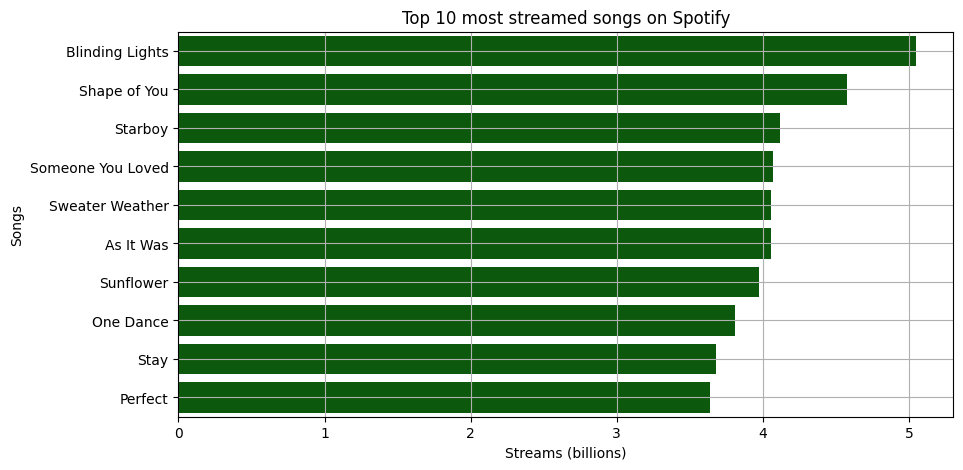

In [218]:
# Paso 6: Visualización los datos

#Top 10 Canciones con más streams
top10 = df.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10["streams_billions"], y=top10["song"], data=top10, color='darkgreen')
plt.title("Top 10 most streamed songs on Spotify")
plt.xlabel("Streams (billions)")
plt.ylabel("Songs")
plt.grid()

Text(0.5, 1.0, 'Top 5 artists with most streamed songs')

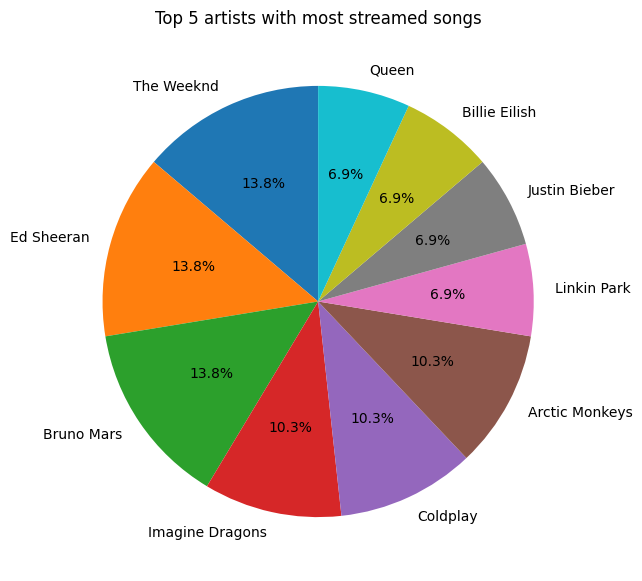

In [226]:
# Top 10 artistas de canciones con más streams
artists = df["artist"].value_counts().head(10)
plt.figure(figsize = (7, 7))
plt.pie(artists, labels=artists.index, startangle=90, autopct='%1.1f%%' )
plt.title("Top 5 artists with most streamed songs")

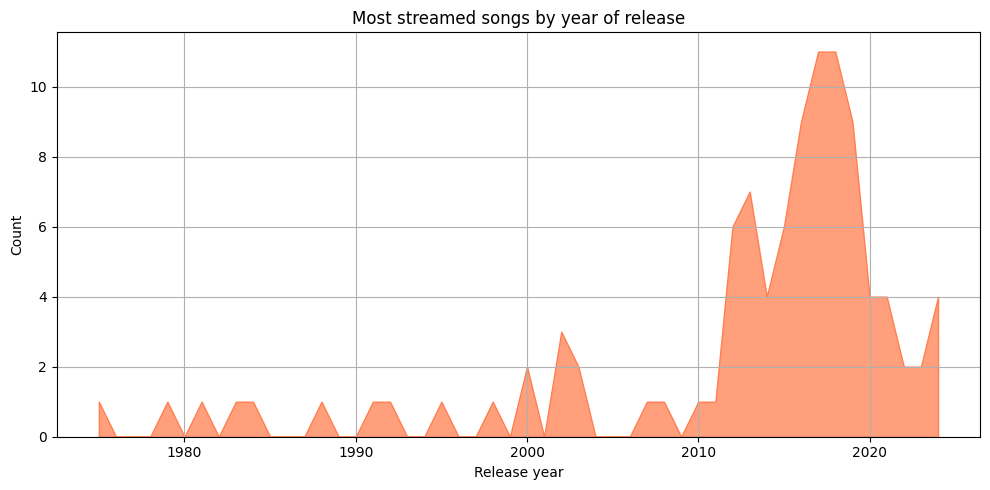

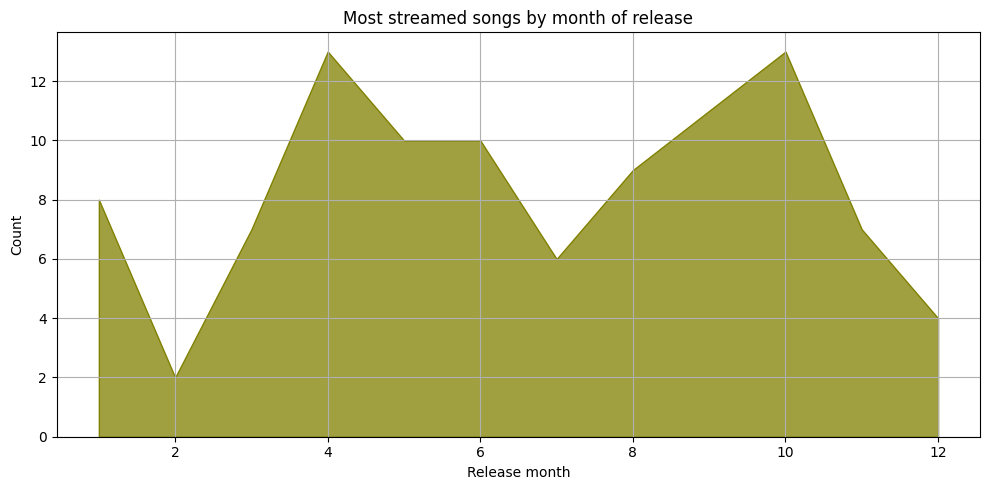

In [254]:
# Distribución de canciones publicadas por año
plt.figure(figsize = (10, 5))
sns.histplot(df["release_date"].dt.year, bins=100, binwidth =1, discrete = True, color = "coral", element="poly")
plt.title("Most streamed songs by year of release")
plt.xlabel("Release year")
plt.tight_layout()
plt.grid()

# Distribución de canciones publicadas por mes
plt.figure(figsize = (10, 5))
sns.histplot(df["release_date"].dt.month, bins=12, discrete = True, color = "olive", element="poly")
plt.title("Most streamed songs by month of release")
plt.xlabel("Release month")
plt.tight_layout()
plt.grid()


(array([10.,  7., 13., 10., 10.,  6.,  9., 11., 13., 11.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

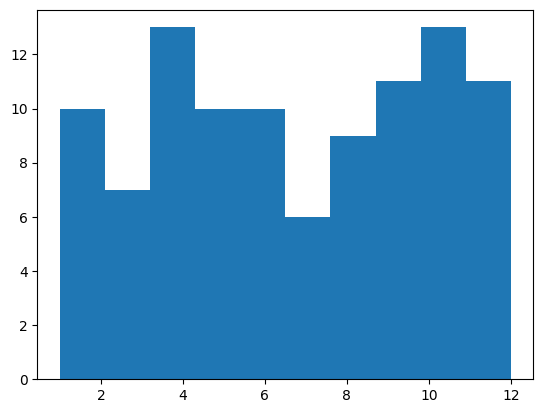